In [52]:
import pandas as pd 
import numpy as np 

In [ ]:
dataset = pd.read_csv("apple_5yr_one.csv")

In [ ]:
dataset.head()

,Date,Close,High,Low,Open,Volume
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
1,2020-06-04,78.32931518554688,79.1312690763083,77.95506657558614,78.83236263047952,87560400
2,2020-06-05,80.56021881103516,80.62097312386399,78.55046881252456,78.57962969607472,137250400
3,2020-06-08,81.03653717041016,81.07056314819836,79.54441498185327,80.25645380649277,95654400
4,2020-06-09,83.59550476074219,83.98919153470604,80.68416273702039,80.71575616737768,147712400


In [ ]:
dataset = dataset.drop(0)

In [ ]:
dataset.dtypes

Date      object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object

In [ ]:
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    if col in dataset.columns:
        dataset[col] = pd.to_numeric(dataset[col], errors='coerce')
    else:
        print(f"Warning: Column '{col}' not found in hi.")

In [ ]:
dataset['High_Low'] = dataset['High'] - dataset['Low']
dataset['Open_Close'] = dataset['Open'] - dataset['Close']
dataset['Daily_Return'] = dataset['Close'].pct_change()
dataset['Target'] = (dataset['Close'].shift(-1) > dataset['Close']).astype(int)  # 1 if price goes up next day

dataset = dataset.dropna()

In [ ]:
#hi.set_index("Date", inplace=True)

In [ ]:
dataset.head()

,Date,Close,High,Low,Open,Volume,High_Low,Open_Close,Daily_Return,Target
2,2020-06-05,80.560219,80.620973,78.550469,78.579630,137250400,2.070504,-1.980589,0.028481,1
3,2020-06-08,81.036537,81.070563,79.544415,80.256454,95654400,1.526148,-0.780083,0.005913,1
4,2020-06-09,83.595505,83.989192,80.684163,80.715756,147712400,3.305029,-2.879749,0.031578,1
5,2020-06-10,85.746208,86.215230,84.105842,84.545702,166651600,2.109388,-1.200506,0.025728,0
6,2020-06-11,81.629494,85.313636,81.527431,84.888356,201662400,3.786206,3.258862,-0.048010,1


In [ ]:
dataest = dataset.dropna()

In [62]:
import matplotlib.pyplot as plt 

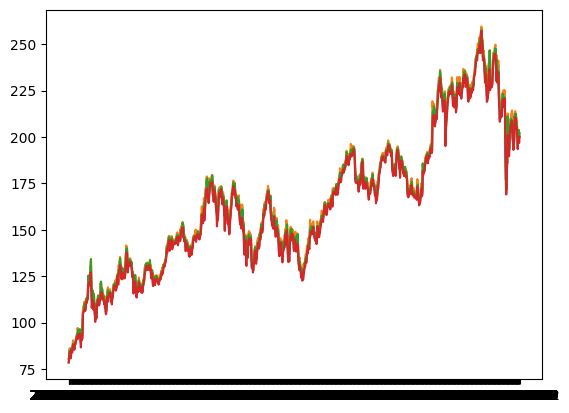

In [ ]:
plt.plot(dataset["Date"], dataset["Close"])
plt.plot(dataset["Date"], dataset["High"])
plt.plot(dataset["Date"], dataset["Open"])
plt.plot(dataset["Date"], dataset["Low"])

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset[['High_Low', 'Open_Close', 'Daily_Return']]
y = dataset['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5697211155378487
              precision    recall  f1-score   support

           0       0.52      0.25      0.34       110
           1       0.58      0.82      0.68       141

    accuracy                           0.57       251
   macro avg       0.55      0.54      0.51       251
weighted avg       0.56      0.57      0.53       251



In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = dataset[features]
y = dataset['Target']

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

reg_model = RandomForestRegressor()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


RMSE: 0.6432697847219742


c:\Users\soumy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [74]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.44223107569721115
              precision    recall  f1-score   support

           0       0.44      0.98      0.61       110
           1       0.60      0.02      0.04       141

    accuracy                           0.44       251
   macro avg       0.52      0.50      0.32       251
weighted avg       0.53      0.44      0.29       251



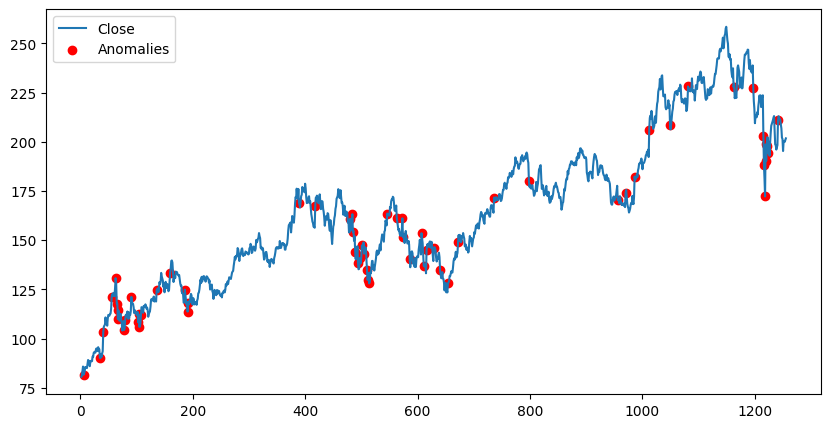

In [ ]:
from sklearn.ensemble import IsolationForest


model = IsolationForest(contamination=0.05)
dataset['Anomaly'] = model.fit_predict(dataset[['Daily_Return']])

# -1 = anomaly
anomalies = dataset[dataset['Anomaly'] == -1]

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(dataset.index, dataset['Close'], label='Close')
plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomalies')
plt.legend()
plt.show()


<Axes: xlabel='Daily_Return', ylabel='High_Low'>

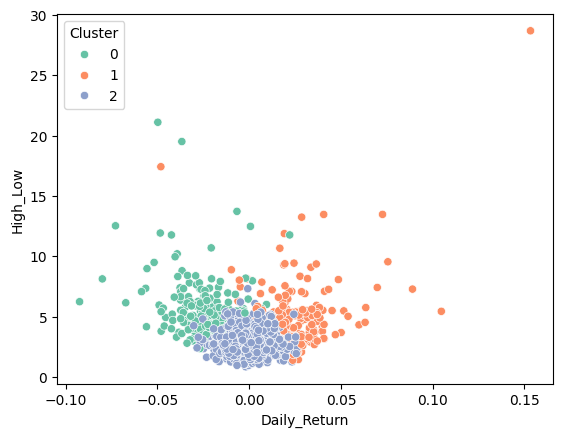

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ['High_Low', 'Open_Close', 'Daily_Return', 'Volume']
X = dataset[features]
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize
import seaborn as sns
sns.scatterplot(data=dataset, x='Daily_Return', y='High_Low', hue='Cluster', palette='Set2')
